In [109]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [110]:
#Read xls File and Load to a dataframe

df = pd.read_excel('weather2015_2019(1).xlsx')
print(df)

       Unnamed: 0.1  Unnamed: 0        Station        Date      Time  \
0                 0           0  Clapp-Library  2015-01-01  00:00:00   
1                 1           1  Clapp-Library  2015-01-01  00:30:00   
2                 2           2  Clapp-Library  2015-01-01  01:00:00   
3                 3           3  Clapp-Library  2015-01-01  01:30:00   
4                 4           4  Clapp-Library  2015-01-01  02:00:00   
...             ...         ...            ...         ...       ...   
97031         97031        9329  Clapp-Library  2020-07-13  08:30:00   
97032         97032        9330  Clapp-Library  2020-07-13  09:00:00   
97033         97033        9331  Clapp-Library  2020-07-13  09:30:00   
97034         97034        9332  Clapp-Library  2020-07-13  10:00:00   
97035         97035        9333  Clapp-Library  2020-07-13  10:30:00   

       Barometric Pressure (mbar)  Air Temp (°C)  RH (%)  Dew Point (°C)  \
0                          1024.1      -8.777778    68.0   

In [111]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, '00:00:00'),
  Text(1, 0, '00:30:00'),
  Text(2, 0, '01:00:00'),
  Text(3, 0, '01:30:00'),
  Text(4, 0, '02:00:00'),
  Text(5, 0, '02:30:00'),
  Text(6, 0, '03:00:00'),
  Text(7, 0, '03:30:00'),
  Text(8, 0, '04:00:00'),
  Text(9, 0, '04:30:00'),
  Text(10, 0, '05:00:00'),
  Text(11, 0, '05:30:00'),
  Text(12, 0, '06:00:00'),
  Text(13, 0, '06:30:00'),
  Text(14, 0, '07:00:00'),
  Text(15, 0, '07:30:00'),
  Text(16, 0, '08:00:00'),
  Text(17, 0, '08:30:00'),
  Text(18, 0, '09:00:00'),
  Text(19, 0, '09:30:00'),
  Text(20, 0, '10:00:00'),
  Text(21, 0, '10:30:00'),
  Text(22, 0, '11:00:00'),
  Text(23, 0, '11:30:00'),
  Text(24, 0, '12:00:00'),
  Text(25, 0, '12:30:00'),
  Text(26, 0, '13:00:00

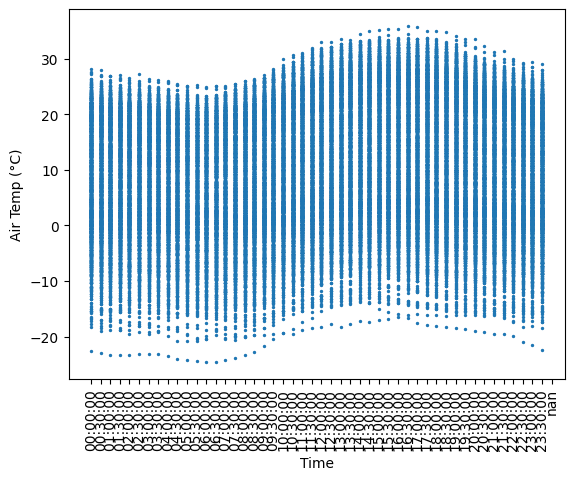

In [112]:
#plot with all the dependent and independent variables
#create x, y arrays
times = df['Time']
temp = df['Air Temp (°C)']

#draw scatter plot
plt.scatter(times, temp, s = 2)
plt.xlabel("Time")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

In [113]:
#Separate years
#df2014 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2015 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2016 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-04-30")])]
df2017 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2017-03-01", "2017-04-30")])]
df2018 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2018-03-01", "2018-04-30")])]
df2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2019-03-01", "2019-04-30")])]
df2020 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2020-03-01", "2020-04-30")])]
df2016

,Unnamed: 0.1,Unnamed: 0,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),...,Wind Direction (ø),Gust Speed (m/s),Solar Radiation (W/m²),PAR (uE),Soil Temp at 5 cm (°C),Soil Temp at 20 cm (°C),Soil Temp at 50_60 cm (°C),Soil Water Content at 5 cm (m³/m³),Soil Water Content at 20 cm (m³/m³),Soil Water Content at 50_60 cm (m³/m³)
20400,20400,2880,Clapp-Library,2016-03-01,00:00:00,1013.6,5.166667,64.0,-1.111111,0.0,...,180.0,7.15264,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20401,20401,2881,Clapp-Library,2016-03-01,00:30:00,1014.4,5.722222,60.0,-1.444444,0.0,...,180.0,8.04672,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20402,20402,2882,Clapp-Library,2016-03-01,01:00:00,1016.6,5.888889,60.0,-1.277778,0.0,...,270.0,14.75232,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20403,20403,2883,Clapp-Library,2016-03-01,01:30:00,1017.9,3.944444,59.0,-3.333333,0.0,...,270.0,16.54048,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20404,20404,2884,Clapp-Library,2016-03-01,02:00:00,1018.8,2.666667,59.0,-4.555556,0.0,...,270.0,17.88160,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23323,23323,5803,Clapp-Library,2016-04-30,21:30:00,1027.1,11.166667,55.0,2.444444,0.0,...,157.5,10.72896,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23324,23324,5804,Clapp-Library,2016-04-30,22:00:00,1027.2,9.944444,57.0,1.833333,0.0,...,157.5,9.83488,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23325,23325,5805,Clapp-Library,2016-04-30,22:30:00,1027.5,9.444444,58.0,1.611111,0.0,...,157.5,8.49376,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23326,23326,5806,Clapp-Library,2016-04-30,23:00:00,1027.4,9.055556,58.0,1.222222,0.0,...,180.0,8.49376,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
[d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-03-31")]

['2016-03-01',
 '2016-03-02',
 '2016-03-03',
 '2016-03-04',
 '2016-03-05',
 '2016-03-06',
 '2016-03-07',
 '2016-03-08',
 '2016-03-09',
 '2016-03-10',
 '2016-03-11',
 '2016-03-12',
 '2016-03-13',
 '2016-03-14',
 '2016-03-15',
 '2016-03-16',
 '2016-03-17',
 '2016-03-18',
 '2016-03-19',
 '2016-03-20',
 '2016-03-21',
 '2016-03-22',
 '2016-03-23',
 '2016-03-24',
 '2016-03-25',
 '2016-03-26',
 '2016-03-27',
 '2016-03-28',
 '2016-03-29',
 '2016-03-30',
 '2016-03-31']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '00:00:00'),
  Text(1, 0, '00:30:00'),
  Text(2, 0, '01:00:00'),
  Text(3, 0, '01:30:00'),
  Text(4, 0, '02:00:00'),
  Text(5, 0, '02:30:00'),
  Text(6, 0, '03:00:00'),
  Text(7, 0, '03:30:00'),
  Text(8, 0, '04:00:00'),
  Text(9, 0, '04:30:00'),
  Text(10, 0, '05:00:00'),
  Text(11, 0, '05:30:00'),
  Text(12, 0, '06:00:00'),
  Text(13, 0, '06:30:00'),
  Text(14, 0, '07:00:00'),
  Text(15, 0, '07:30:00'),
  Text(16, 0, '08:00:00'),
  Text(17, 0, '08:30:00'),
  Text(18, 0, '09:00:00'),
  Text(19, 0, '09:30:00'),
  Text(20, 0, '10:00:00'),
  Text(21, 0, '10:30:00'),
  Text(22, 0, '11:00:00'),
  Text(23, 0, '11:30:00'),
  Text(24, 0, '12:00:00'),
  Text(25, 0, '12:30:00'),
  Text(26, 0, '13:00:00'),
  

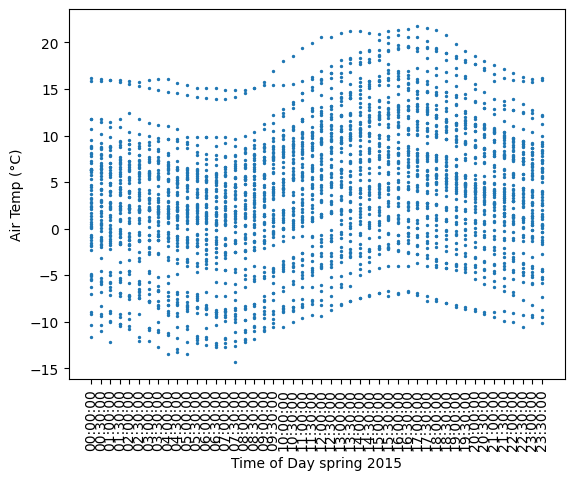

In [115]:
#plot with all the dependent and independent variables for 2015
#create x, y arrays

times2015 = df2015['Time']
temp2015 = df2015['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2015, temp2015, s = 2)
plt.xlabel("Time of Day spring 2015")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '00:00:00'),
  Text(1, 0, '00:30:00'),
  Text(2, 0, '01:00:00'),
  Text(3, 0, '01:30:00'),
  Text(4, 0, '02:00:00'),
  Text(5, 0, '02:30:00'),
  Text(6, 0, '03:00:00'),
  Text(7, 0, '03:30:00'),
  Text(8, 0, '04:00:00'),
  Text(9, 0, '04:30:00'),
  Text(10, 0, '05:00:00'),
  Text(11, 0, '05:30:00'),
  Text(12, 0, '06:00:00'),
  Text(13, 0, '06:30:00'),
  Text(14, 0, '07:00:00'),
  Text(15, 0, '07:30:00'),
  Text(16, 0, '08:00:00'),
  Text(17, 0, '08:30:00'),
  Text(18, 0, '09:00:00'),
  Text(19, 0, '09:30:00'),
  Text(20, 0, '10:00:00'),
  Text(21, 0, '10:30:00'),
  Text(22, 0, '11:00:00'),
  Text(23, 0, '11:30:00'),
  Text(24, 0, '12:00:00'),
  Text(25, 0, '12:30:00'),
  Text(26, 0, '13:00:00'),
  

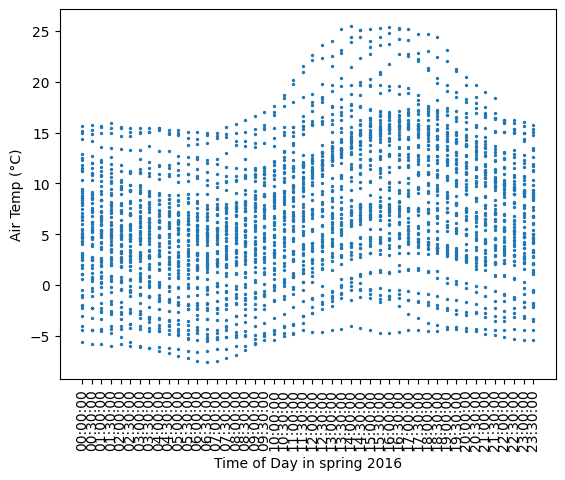

In [116]:
#plot with all the dependent and independent variables for 2016
#create x, y arrays
times2016 = df2016['Time']
temp2016 = df2016['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2016, temp2016, s = 2)
plt.xlabel("Time of Day in spring 2016")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '00:00:00'),
  Text(1, 0, '00:30:00'),
  Text(2, 0, '01:00:00'),
  Text(3, 0, '01:30:00'),
  Text(4, 0, '02:00:00'),
  Text(5, 0, '02:30:00'),
  Text(6, 0, '03:00:00'),
  Text(7, 0, '03:30:00'),
  Text(8, 0, '04:00:00'),
  Text(9, 0, '04:30:00'),
  Text(10, 0, '05:00:00'),
  Text(11, 0, '05:30:00'),
  Text(12, 0, '06:00:00'),
  Text(13, 0, '06:30:00'),
  Text(14, 0, '07:00:00'),
  Text(15, 0, '07:30:00'),
  Text(16, 0, '08:00:00'),
  Text(17, 0, '08:30:00'),
  Text(18, 0, '09:00:00'),
  Text(19, 0, '09:30:00'),
  Text(20, 0, '10:00:00'),
  Text(21, 0, '10:30:00'),
  Text(22, 0, '11:00:00'),
  Text(23, 0, '11:30:00'),
  Text(24, 0, '12:00:00'),
  Text(25, 0, '12:30:00'),
  Text(26, 0, '13:00:00'),
  

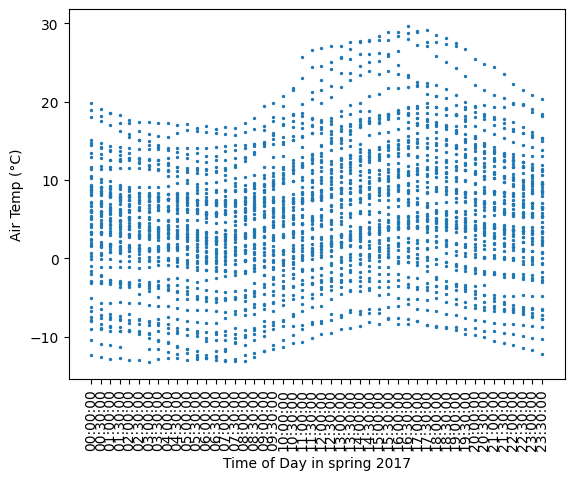

In [117]:
#plot with all the dependent and independent variables for 2017
#create x, y arrays
times2017 = df2017['Time']
temp2017 = df2017['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2017, temp2017, s = 2)
plt.xlabel("Time of Day in spring 2017")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '00:00:00'),
  Text(1, 0, '00:30:00'),
  Text(2, 0, '01:00:00'),
  Text(3, 0, '01:30:00'),
  Text(4, 0, '02:00:00'),
  Text(5, 0, '02:30:00'),
  Text(6, 0, '03:00:00'),
  Text(7, 0, '03:30:00'),
  Text(8, 0, '04:00:00'),
  Text(9, 0, '04:30:00'),
  Text(10, 0, '05:00:00'),
  Text(11, 0, '05:30:00'),
  Text(12, 0, '06:00:00'),
  Text(13, 0, '06:30:00'),
  Text(14, 0, '07:00:00'),
  Text(15, 0, '07:30:00'),
  Text(16, 0, '08:00:00'),
  Text(17, 0, '08:30:00'),
  Text(18, 0, '09:00:00'),
  Text(19, 0, '09:30:00'),
  Text(20, 0, '10:00:00'),
  Text(21, 0, '10:30:00'),
  Text(22, 0, '11:00:00'),
  Text(23, 0, '11:30:00'),
  Text(24, 0, '12:00:00'),
  Text(25, 0, '12:30:00'),
  Text(26, 0, '13:00:00'),
  

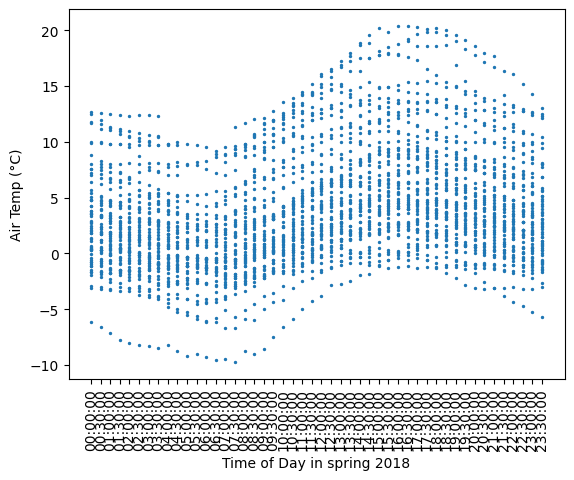

In [118]:
#plot with all the dependent and independent variables for 2018
#create x, y arrays
times2018 = df2018['Time']
temp2018 = df2018['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2018, temp2018, s = 2)
plt.xlabel("Time of Day in spring 2018")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '00:00:00'),
  Text(1, 0, '00:30:00'),
  Text(2, 0, '01:00:00'),
  Text(3, 0, '01:30:00'),
  Text(4, 0, '02:00:00'),
  Text(5, 0, '02:30:00'),
  Text(6, 0, '03:00:00'),
  Text(7, 0, '03:30:00'),
  Text(8, 0, '04:00:00'),
  Text(9, 0, '04:30:00'),
  Text(10, 0, '05:00:00'),
  Text(11, 0, '05:30:00'),
  Text(12, 0, '06:00:00'),
  Text(13, 0, '06:30:00'),
  Text(14, 0, '07:00:00'),
  Text(15, 0, '07:30:00'),
  Text(16, 0, '08:00:00'),
  Text(17, 0, '08:30:00'),
  Text(18, 0, '09:00:00'),
  Text(19, 0, '09:30:00'),
  Text(20, 0, '10:00:00'),
  Text(21, 0, '10:30:00'),
  Text(22, 0, '11:00:00'),
  Text(23, 0, '11:30:00'),
  Text(24, 0, '12:00:00'),
  Text(25, 0, '12:30:00'),
  Text(26, 0, '13:00:00'),
  

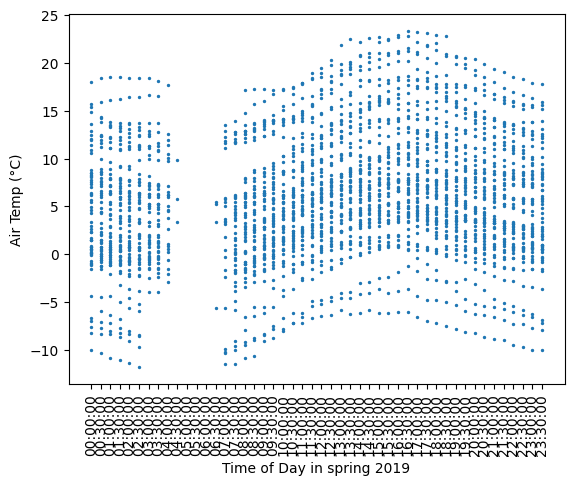

In [119]:
#plot with all the dependent and independent variables for 2019
#create x, y arrays
times2019 = df2019['Time']
temp2019 = df2019['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2019, temp2019, s = 2)
plt.xlabel("Time of Day in spring 2019")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, '00:00:00'),
  Text(1, 0, '00:30:00'),
  Text(2, 0, '01:00:00'),
  Text(3, 0, '01:30:00'),
  Text(4, 0, '02:00:00'),
  Text(5, 0, '02:30:00'),
  Text(6, 0, '03:00:00'),
  Text(7, 0, '03:30:00'),
  Text(8, 0, '04:00:00'),
  Text(9, 0, '04:30:00'),
  Text(10, 0, '05:00:00'),
  Text(11, 0, '05:30:00'),
  Text(12, 0, '06:00:00'),
  Text(13, 0, '06:30:00'),
  Text(14, 0, '07:00:00'),
  Text(15, 0, '07:30:00'),
  Text(16, 0, '08:00:00'),
  Text(17, 0, '08:30:00'),
  Text(18, 0, '09:00:00'),
  Text(19, 0, '09:30:00'),
  Text(20, 0, '10:00:00'),
  Text(21, 0, '10:30:00'),
  Text(22, 0, '11:00:00'),
  Text(23, 0, '11:30:00'),
  Text(24, 0, '12:00:00'),
  Text(25, 0, '12:30:00'),
  Text(26, 0, '13:00:00'),
  

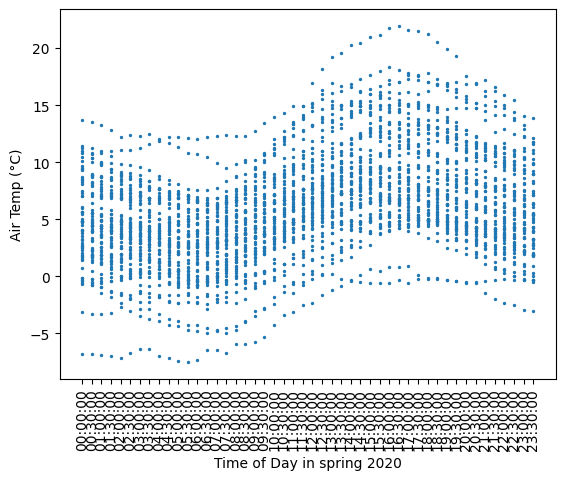

In [120]:
#plot with all the dependent and independent variables for 2020
#create x, y arrays
times2020 = df2020['Time']
temp2020 = df2020['Air Temp (°C)']

#draw scatter plot
plt.scatter(times2020, temp2020, s = 2)
plt.xlabel("Time of Day in spring 2020")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

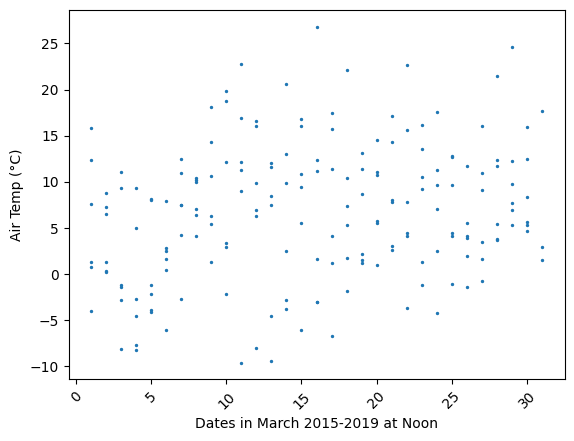

In [121]:
#Separate specific time
#df2015_2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-0-01", "2019-12-31")])]
df2015_2019 = pd.concat([df2015,df2016,df2017])
df15_19_noon = df2015_2019[df2015_2019["Time"]== '12:00:00']

#change dates to remove year
#print(df15_19_noon)

#Plot dates by temps for 2015
date15_19_noon = df15_19_noon['Date']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

#print(date15_19_noon)
date15_19_noon = date15_19_noon.astype(str)
date15_19_noon = date15_19_noon.str.split("-").str[-1].astype(int)

#draw scatter plot
plt.scatter(date15_19_noon, temp15_19_noon, s = 2)
plt.xlabel("Dates in March 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)


Text(0, 0.5, 'Air Temp (°C)')

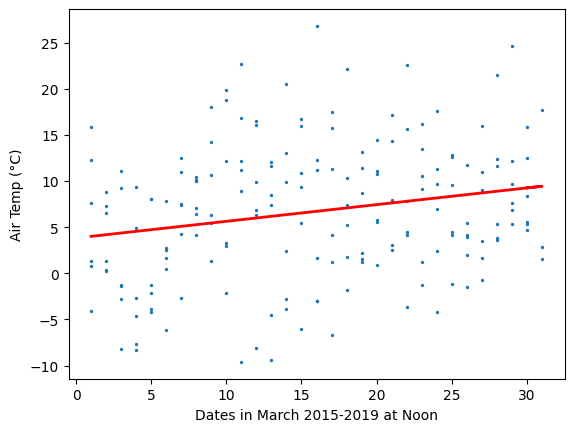

In [122]:
# plot linear regression

# convert to 2-D array
date15_19_noon = date15_19_noon.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_19_noon,temp15_19_noon)
temp15_19_noon_pred = model.predict(date15_19_noon)

plt.scatter(date15_19_noon,temp15_19_noon, s=2)
plt.plot(date15_19_noon, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in March 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")

In [123]:
# Get the model parameters
r_sq = model.score(date15_19_noon, temp15_19_noon)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.04762621995770844
intercept: [3.82707761]
slope: [[0.1811887]]


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

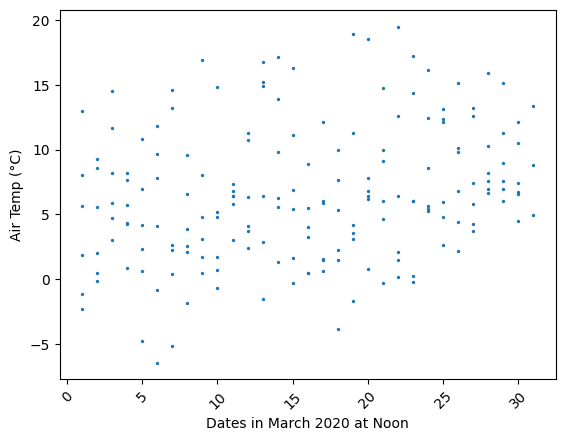

In [124]:
##Plot dates by temps for 2020
df20_19 =pd.concat([df2018,df2019,df2020])
df2020_noon = df20_19[df20_19["Time"]== '12:00:00']
date2020_noon = df2020_noon['Date']
temp2020_noon = df2020_noon['Air Temp (°C)']

date2020_noon = date2020_noon.astype(str)
date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)

#draw scatter plot
plt.scatter(date2020_noon, temp2020_noon, s = 2)
plt.xlabel("Dates in March 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)


25.01183220857937
0.05979927071379787


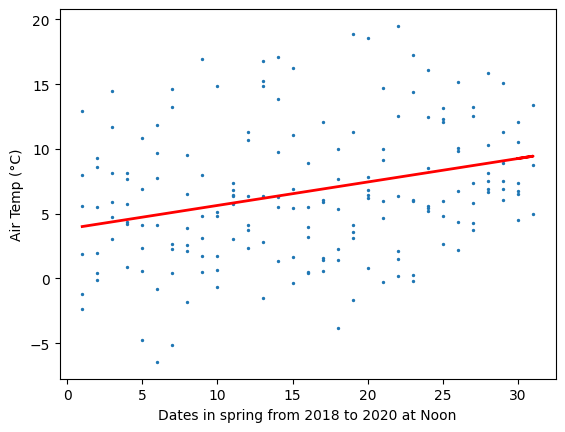

In [125]:
# convert to 2-D array
date2020_noon = date2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

# predict 2020 air temperature at noon
temp2020_noon_pred = model.predict(date2020_noon)

# draw scatter plot
plt.scatter(date2020_noon,temp2020_noon, s=2)
plt.plot(date2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Dates in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)


print (MSE)
print (R2)



In [126]:
# Model Evaluation by using MAE
from sklearn.metrics import mean_absolute_percentage_error

true = temp2020_noon
predict = temp2020_noon_pred

print(mean_absolute_percentage_error(true, predict))

2.399414323302085
